# Initial working notebook

## Project Planning

#### Define your target.
- The target is the Edwards Aquifer water level. Using Time Series Analysis I will attempt to predict future water levels.

#### Outline your goals and define deliverables.
- Goals: 
    - Create a time series model which will accurately predict water levels for the Edwards Aquifer.
    - Better understand historic water usage for Bexar county and what factors may affect rises or falls in the Edwards Aquifer water level.
    - Explore relationships between historic water level, water usage, population, precipitation, and temperature data for Bexar county.
- Deliverables:
    - Necessary helper files to store code for final notebook, eg. wrangle.py, explore.py, model.py
    - Github Repo w/ Final Notebook
        - Includes working through the entire DS pipeline, code comments, executive summary of project, 
    - README on github repo project page
        - Project pipeline/planning, audience, executive summary, data dictionary, how to reproduce, etc.
    - Project summary and writeup for my resume or other professional portfolio pieces
    

#### Document initial thoughts and hypotheses.
- Due to increased demand I suspect that water usage will increase with time; this will have a negative impact on the Edwards Aquifer water level and result in a decreased supply over time.
- Temperature and precipitation levels will be correlateed with the water level as well.
    - Climate change will affect this here; as there is more heat more water will be used.
    - I'm unsure exactly how precipitation levels will change over time.

#### Create a Trello board where you document what those deliverables are and the steps you will take to get there.
Done!

## Acquire 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from re import sub

plt.rcParams["figure.figsize"] = (16, 10)

Pulling all files into dataframes and examining for nulls.

In [2]:
aquifer = pd.read_csv('data_files/aquifer_j17_well_data.csv', parse_dates=[1])
aquifer.head()

,Site,DailyHighDate,WaterLevelElevation
0,J17WL,2022-06-12,637.95
1,J17WL,2022-06-11,636.93
2,J17WL,2022-06-10,637.17
3,J17WL,2022-06-09,638.13
4,J17WL,2022-06-08,639.48


In [3]:
aquifer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31919 entries, 0 to 31918
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Site                 31919 non-null  object        
 1   DailyHighDate        31919 non-null  datetime64[ns]
 2   WaterLevelElevation  31919 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 748.2+ KB


In [4]:
aquifer.WaterLevelElevation.value_counts().sort_index()

612.51    1
612.74    1
613.00    1
613.02    1
613.20    1
         ..
702.91    1
702.95    1
703.18    1
703.19    1
703.31    1
Name: WaterLevelElevation, Length: 6942, dtype: int64

No nulls seem to be present in main aquifer DF.

In [5]:
temps = pd.read_csv('data_files/monthly_avg_temp_bexar_county.csv', parse_dates=[8])
temps.head()

,AGENCY 0,DATA 0,DATA TYPE 0,LOCATION 0,LOCATION TYPE 0,SOURCE 0,SOURCE TYPE 0,SUBJECT 0,TIME 0,TIME TYPE 0
0,National Centers for Environmental Information,50.1,STRING,Bexar,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Temperature MA Split By FIPS,1974-01-01,ISO_DATE
1,National Centers for Environmental Information,57.4,STRING,Bexar,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Temperature MA Split By FIPS,2019-02-01,ISO_DATE
2,National Centers for Environmental Information,59.0,STRING,Bexar,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Temperature MA Split By FIPS,1903-11-01,ISO_DATE
3,National Centers for Environmental Information,55.4,STRING,Bexar,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Temperature MA Split By FIPS,1974-02-01,ISO_DATE
4,National Centers for Environmental Information,67.1,STRING,Bexar,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Temperature MA Split By FIPS,1974-03-01,ISO_DATE


In [6]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   AGENCY 0         1529 non-null   object        
 1   DATA 0           1529 non-null   float64       
 2   DATA TYPE 0      1529 non-null   object        
 3   LOCATION 0       1529 non-null   object        
 4   LOCATION TYPE 0  1529 non-null   object        
 5   SOURCE 0         1529 non-null   object        
 6   SOURCE TYPE 0    1529 non-null   object        
 7   SUBJECT 0        1529 non-null   object        
 8   TIME 0           1529 non-null   datetime64[ns]
 9   TIME TYPE 0      1529 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 119.6+ KB


No apparent nulls will have to examine later

In [7]:
precip = pd.read_csv('data_files/monthly_total_precipitation_bexar_county.csv', parse_dates=[8])
precip.head()

,AGENCY 0,DATA 0,DATA TYPE 0,LOCATION 0,LOCATION TYPE 0,SOURCE 0,SOURCE TYPE 0,SUBJECT 0,TIME 0,TIME TYPE 0
0,National Centers for Environmental Information,4.55,STRING,Bexar,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1991-01-01,ISO_DATE
1,National Centers for Environmental Information,6.57,STRING,Bexar,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,2019-06-01,ISO_DATE
2,National Centers for Environmental Information,1.67,STRING,Bexar,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,2019-01-01,ISO_DATE
3,National Centers for Environmental Information,2.21,STRING,Bexar,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1899-05-01,ISO_DATE
4,National Centers for Environmental Information,0.94,STRING,Bexar,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Precipitation MA Split By FIPS,1956-01-01,ISO_DATE


In [8]:
precip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   AGENCY 0         1529 non-null   object        
 1   DATA 0           1529 non-null   float64       
 2   DATA TYPE 0      1529 non-null   object        
 3   LOCATION 0       1529 non-null   object        
 4   LOCATION TYPE 0  1529 non-null   object        
 5   SOURCE 0         1529 non-null   object        
 6   SOURCE TYPE 0    1529 non-null   object        
 7   SUBJECT 0        1529 non-null   object        
 8   TIME 0           1529 non-null   datetime64[ns]
 9   TIME TYPE 0      1529 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 119.6+ KB


No apparent nulls. 

In [9]:
pop = pd.read_csv('data_files/population_by_year_bexar_county.csv', parse_dates=[0])
pop.head()

,Year,Population,Growth,GrowthRate
0,2022-01-01,2070660,22370,0.0109
1,2021-01-01,2048290,22370,0.0110
2,2020-01-01,2025920,22370,0.0112
3,2019-01-01,2003550,22360,0.0113
4,2018-01-01,1981190,24200,0.0124


In [10]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year        28 non-null     datetime64[ns]
 1   Population  28 non-null     int64         
 2   Growth      28 non-null     int64         
 3   GrowthRate  28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.0 KB


No apparent nulls.

In [11]:
#Made a new csv in excel with combined data for 1984-2019
usage = pd.read_csv('data_files/water_use_bexar_county_1984_2019.csv', parse_dates=[0])
usage.head()

,Year,Population,Municipal,Manu-facturing,Mining,Power,Irrigation,Livestock,Municipal Ground Water,Municipal Surface Water,...,Mining Reuse & Brackish,Power Ground Water,Power Surface Water,Power Reuse,Irrigation Ground Water,Irrigation Surface Water,Irrigation Reuse,Livestock Ground Water,Livestock Surface Water,Livestock Reuse
0,1984-01-01,NaN,252584,11445,259,33106,40347,1635,252273,311,...,NaN,1300,31806,NaN,23489,16858,NaN,162,1473,NaN
1,1985-01-01,NaN,231034,12516,2763,27438,29411,1390,230794,240,...,NaN,1974,25464,NaN,16967,12444,NaN,138,1252,NaN
2,1986-01-01,NaN,235506,14000,0,23840,31710,1466,235293,213,...,NaN,1859,21981,NaN,16610,15100,NaN,146,1320,NaN
3,1987-01-01,NaN,229866,10661,1613,26735,23368,1226,229575,291,...,NaN,2013,24722,NaN,12949,10419,NaN,122,1104,NaN
4,1988-01-01,NaN,250563,13675,1729,34277,24130,1283,250269,294,...,NaN,1400,32877,NaN,15595,8535,NaN,128,1155,NaN


In [12]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      36 non-null     datetime64[ns]
 1   Population                20 non-null     float64       
 2   Municipal                 36 non-null     int64         
 3   Manu-facturing            36 non-null     int64         
 4   Mining                    36 non-null     int64         
 5   Power                     36 non-null     int64         
 6   Irrigation                36 non-null     int64         
 7   Livestock                 36 non-null     int64         
 8   Municipal Ground Water    36 non-null     int64         
 9   Municipal Surface Water   36 non-null     int64         
 10  Municipal Reuse           5 non-null      float64       
 11  Mfg Ground Water          36 non-null     int64         
 12  Mfg Surface Water       

In the main part of the usage df there are no nulls except for population which I can fill in later. However all resuse columns have 31 nulls as it seems that reuse wasn't tracked until 2015.

### Cleanup of dataframes before initial exploration.
Each dataframe needs the following: 
- superfluous columns dropped
- date set as index
- columns renamed to snake_case

In [13]:
# Making a snake case fixer
def snake_case(s):
  return '_'.join(
    sub('([A-Z][a-z]+)', r' \1',
    sub('([A-Z]+)', r' \1',
    s.replace('-', ''))).split()).lower()

# Making a df column renamer using the snake_case function above.
def column_renamer(df):
    new_names = {}
    for col in df.columns.to_list():
        new_names[col] = snake_case(col)
    renamed = df.rename(columns = new_names)
    return renamed

Starting with aquifer dataset.

In [14]:
aquifer.head()

,Site,DailyHighDate,WaterLevelElevation
0,J17WL,2022-06-12,637.95
1,J17WL,2022-06-11,636.93
2,J17WL,2022-06-10,637.17
3,J17WL,2022-06-09,638.13
4,J17WL,2022-06-08,639.48


In [15]:
aquifer = aquifer.drop('Site', axis=1)

In [16]:
aquifer = aquifer.rename(columns = {'DailyHighDate': 'date'}).set_index('date')
aquifer.head()

,WaterLevelElevation
date,
2022-06-12,637.95
2022-06-11,636.93
2022-06-10,637.17
2022-06-09,638.13
2022-06-08,639.48


In [17]:
aquifer = column_renamer(aquifer)
aquifer

,water_level_elevation
date,
2022-06-12,637.95
2022-06-11,636.93
2022-06-10,637.17
2022-06-09,638.13
2022-06-08,639.48
...,...
1932-11-16,675.74
1932-11-15,675.92
1932-11-14,675.97


In [18]:
aquifer = aquifer.sort_index()

Aquifer dataset is cleaned and ready for explore and modeling.

Moving to temps dataset.

In [19]:
temps = temps.rename(columns = {'DATA 0': 'avg_monthly_temp', 'TIME 0': 'date'})

In [20]:
temps.head(1)

,AGENCY 0,avg_monthly_temp,DATA TYPE 0,LOCATION 0,LOCATION TYPE 0,SOURCE 0,SOURCE TYPE 0,SUBJECT 0,date,TIME TYPE 0
0,National Centers for Environmental Information,50.1,STRING,Bexar,COUNTY,https://www.ncei.noaa.gov/pub/data/cirs/climdiv/,URL,Temperature MA Split By FIPS,1974-01-01,ISO_DATE


In [21]:
temps = temps[['avg_monthly_temp', 'date']]
temps.head()

,avg_monthly_temp,date
0,50.1,1974-01-01
1,57.4,2019-02-01
2,59.0,1903-11-01
3,55.4,1974-02-01
4,67.1,1974-03-01


In [22]:
temps = temps.set_index('date').sort_index()
temps.head()

,avg_monthly_temp
date,
1895-01-01,51.6
1895-02-01,43.6
1895-03-01,60.2
1895-04-01,67.7
1895-05-01,71.8


The temps dataframe looks good now.

Moving on to precip dataframe.

In [23]:
precip = precip.rename(columns = {'DATA 0': 'total_monthly_precip', 'TIME 0': 'date'})
precip = precip[['total_monthly_precip', 'date']]
precip.set_index('date').sort_index()

,total_monthly_precip
date,
1895-01-01,1.28
1895-02-01,3.34
1895-03-01,0.52
1895-04-01,2.68
1895-05-01,6.93
...,...
2022-01-01,0.40
2022-02-01,1.28
2022-03-01,0.50


The precip dataframe looks good now.

Moving on to pop dataframe.

In [24]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year        28 non-null     datetime64[ns]
 1   Population  28 non-null     int64         
 2   Growth      28 non-null     int64         
 3   GrowthRate  28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.0 KB


In [25]:
pop = column_renamer(pop)
pop = pop.rename(columns = {'year':'date'})
pop = pop[['date', 'population']]
pop = pop.set_index('date').sort_index()

In [26]:
pop

,population
date,
1850-01-01,6052
1860-01-01,14454
1870-01-01,16043
1880-01-01,30470
1890-01-01,49266
1900-01-01,69422
1910-01-01,119676
1920-01-01,202096
1930-01-01,292533


The pop dataframe looks good now.

Moving on to usage.

In [27]:
usage = column_renamer(usage)
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   year                      36 non-null     datetime64[ns]
 1   population                20 non-null     float64       
 2   municipal                 36 non-null     int64         
 3   manufacturing             36 non-null     int64         
 4   mining                    36 non-null     int64         
 5   power                     36 non-null     int64         
 6   irrigation                36 non-null     int64         
 7   livestock                 36 non-null     int64         
 8   municipal_ground_water    36 non-null     int64         
 9   municipal_surface_water   36 non-null     int64         
 10  municipal_reuse           5 non-null      float64       
 11  mfg_ground_water          36 non-null     int64         
 12  mfg_surface_water       

In [28]:
usage = usage.rename(columns = {'year':'date'})
usage = usage.set_index('date').sort_index()

In [29]:
usage.head()

,population,municipal,manufacturing,mining,power,irrigation,livestock,municipal_ground_water,municipal_surface_water,municipal_reuse,...,mining_reuse_&_brackish,power_ground_water,power_surface_water,power_reuse,irrigation_ground_water,irrigation_surface_water,irrigation_reuse,livestock_ground_water,livestock_surface_water,livestock_reuse
date,,,,,,,,,,,,,,,,,,,,,
1984-01-01,NaN,252584,11445,259,33106,40347,1635,252273,311,NaN,...,NaN,1300,31806,NaN,23489,16858,NaN,162,1473,NaN
1985-01-01,NaN,231034,12516,2763,27438,29411,1390,230794,240,NaN,...,NaN,1974,25464,NaN,16967,12444,NaN,138,1252,NaN
1986-01-01,NaN,235506,14000,0,23840,31710,1466,235293,213,NaN,...,NaN,1859,21981,NaN,16610,15100,NaN,146,1320,NaN
1987-01-01,NaN,229866,10661,1613,26735,23368,1226,229575,291,NaN,...,NaN,2013,24722,NaN,12949,10419,NaN,122,1104,NaN
1988-01-01,NaN,250563,13675,1729,34277,24130,1283,250269,294,NaN,...,NaN,1400,32877,NaN,15595,8535,NaN,128,1155,NaN


Making a new column on usage 'total consumption'

In [39]:
usage['total_consumption'] = usage.municipal + usage.manufacturing + usage.mining + usage.power + usage.irrigation + usage.livestock

In [40]:
usage.head()

,population,municipal,manufacturing,mining,power,irrigation,livestock,municipal_ground_water,municipal_surface_water,municipal_reuse,...,power_ground_water,power_surface_water,power_reuse,irrigation_ground_water,irrigation_surface_water,irrigation_reuse,livestock_ground_water,livestock_surface_water,livestock_reuse,total_consumption
date,,,,,,,,,,,,,,,,,,,,,
1984-01-01,NaN,252584,11445,259,33106,40347,1635,252273,311,NaN,...,1300,31806,NaN,23489,16858,NaN,162,1473,NaN,339376
1985-01-01,NaN,231034,12516,2763,27438,29411,1390,230794,240,NaN,...,1974,25464,NaN,16967,12444,NaN,138,1252,NaN,304552
1986-01-01,NaN,235506,14000,0,23840,31710,1466,235293,213,NaN,...,1859,21981,NaN,16610,15100,NaN,146,1320,NaN,306522
1987-01-01,NaN,229866,10661,1613,26735,23368,1226,229575,291,NaN,...,2013,24722,NaN,12949,10419,NaN,122,1104,NaN,293469
1988-01-01,NaN,250563,13675,1729,34277,24130,1283,250269,294,NaN,...,1400,32877,NaN,15595,8535,NaN,128,1155,NaN,325657


Dataframes are all cleaned, renamed, prepped and ready to go.

- Aquifer is the main dataframe I will be doing the Time Series Analysis on. It shows the Edwards Aquifer daiily high water level for index well J17 (in Bexar county) from Nov 12, 1932 to June 11, 2022
- Usage is water usage stats for Bexar county from 1984-2019; It has some null values that I will leave for now to see if it sheds light on any possible new trends since the nulls are all pre2015 when certain data wasn't collected.
- Pop is population stats for Bexar county from 1850-2022
- Temps is the average monthly temperature for Bexar county from Jan 1895 to May 2022
- Precip is the total monthly precipitation for Bexar county from Jan 1895 to May 2022

## Joining tables together and visualizing the data for initial exploration

In [32]:
weather = temps.merge(precip, on ='date')

In [33]:
weather = weather.set_index('date').sort_index()

In [34]:
weather.head()

,avg_monthly_temp,total_monthly_precip
date,,
1895-01-01,51.6,1.28
1895-02-01,43.6,3.34
1895-03-01,60.2,0.52
1895-04-01,67.7,2.68
1895-05-01,71.8,6.93


<AxesSubplot:xlabel='date'>

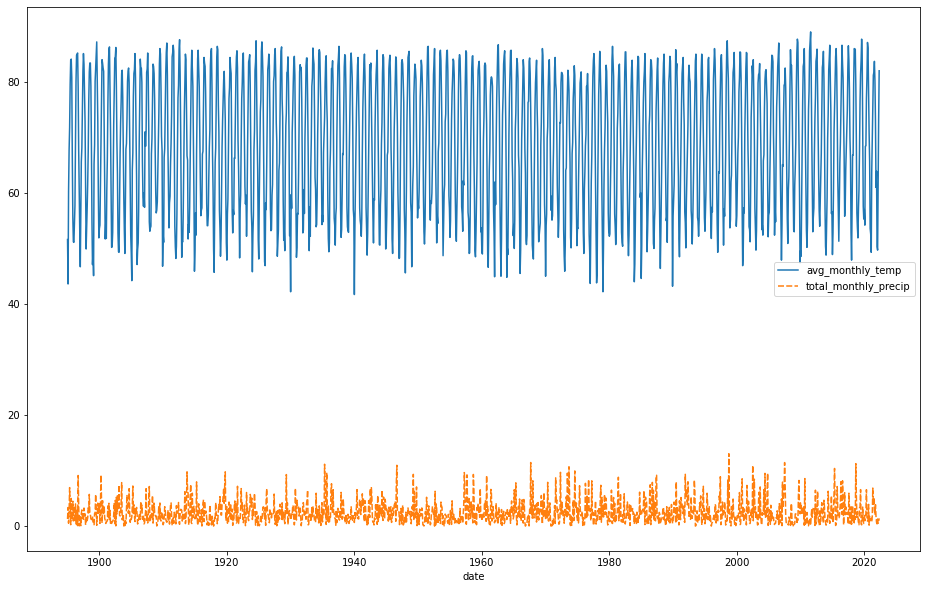

In [35]:
sns.lineplot(data= weather)

<AxesSubplot:xlabel='date'>

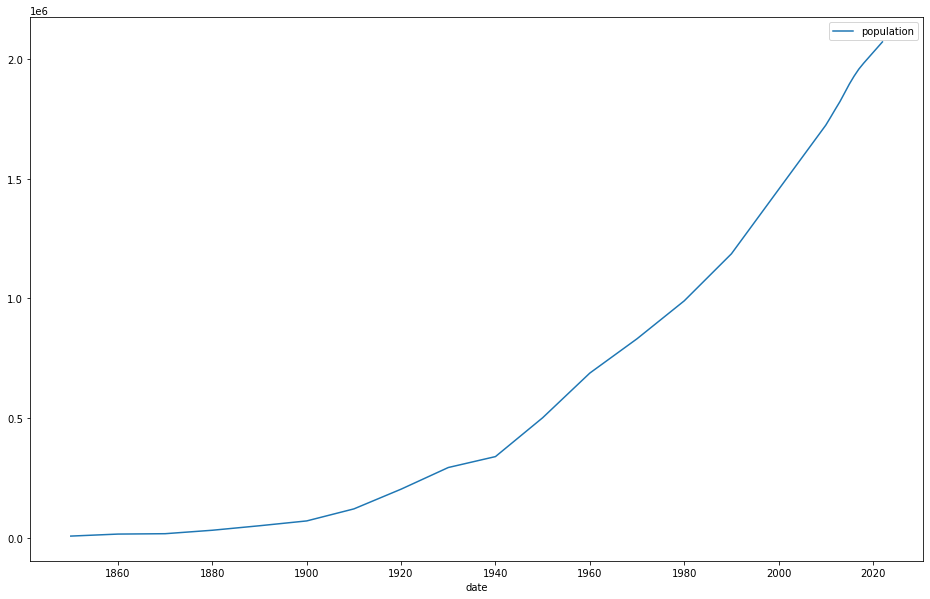

In [36]:
sns.lineplot(data=pop)

<AxesSubplot:xlabel='date'>

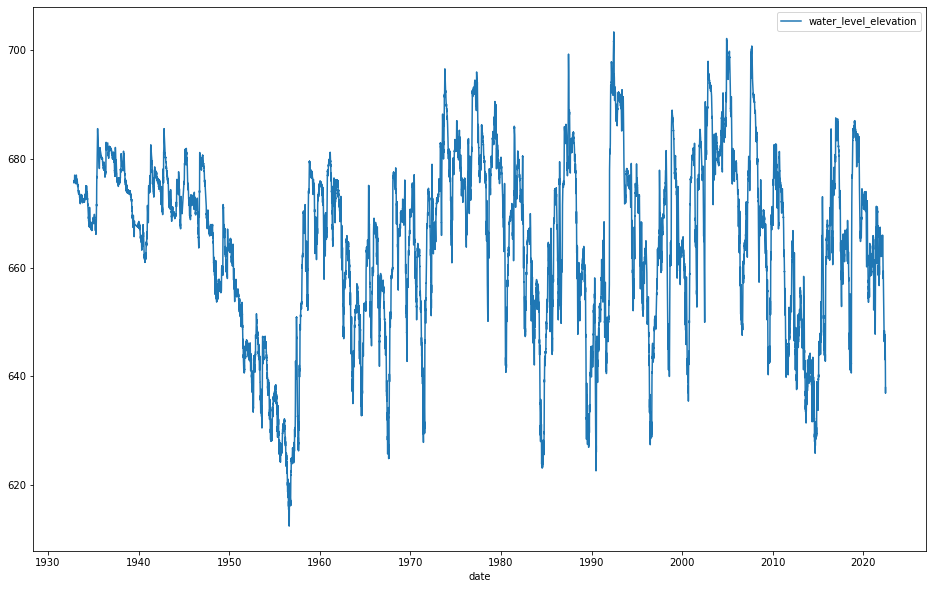

In [37]:
sns.lineplot(data=aquifer)

<function matplotlib.pyplot.legend(*args, **kwargs)>

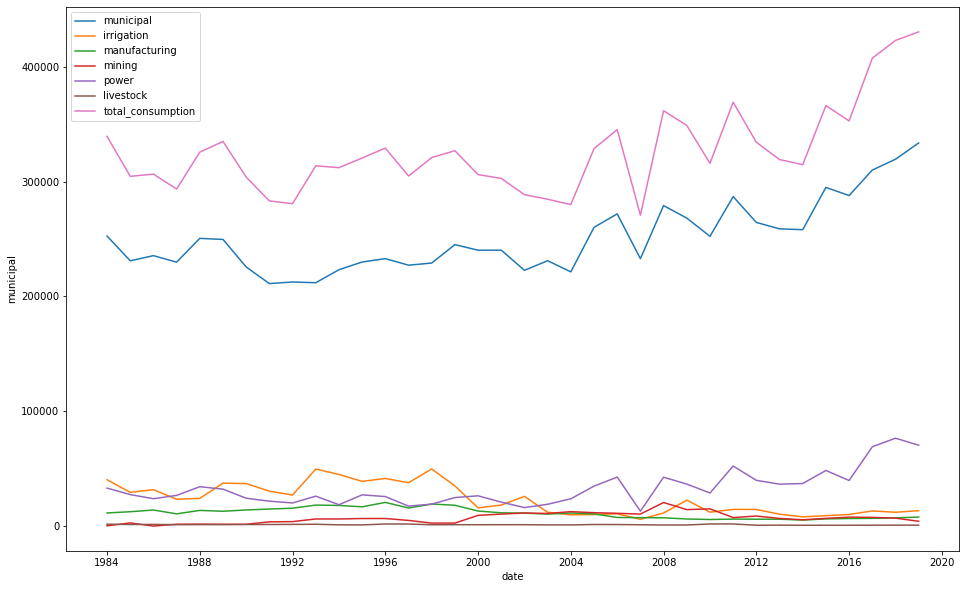

In [59]:
sns.lineplot(data= usage, y = 'municipal',x='date', label='municipal')
sns.lineplot(data= usage, y = 'irrigation',x='date', label='irrigation')
sns.lineplot(data= usage, y = 'manufacturing',x='date', label='manufacturing')
sns.lineplot(data= usage, y = 'mining',x='date', label='mining')
sns.lineplot(data= usage, y = 'power',x='date', label='power')
sns.lineplot(data= usage, y = 'livestock',x='date', label='livestock')
sns.lineplot(data= usage, y = 'total_consumption',x='date', label='total_consumption')
plt.legend

In [44]:
usage.describe().T

,count,mean,std,min,25%,50%,75%,max
population,20.0,1.689650e+06,204851.526135,1392931.0,1504689.00,1682364.5,1857511.50,2003554.0
municipal,36.0,2.509064e+05,30734.155561,211173.0,229670.00,242693.0,265376.00,333637.0
manufacturing,36.0,1.129922e+04,4541.183937,5247.0,7031.25,11348.5,14247.75,20627.0
mining,36.0,7.010778e+03,4609.781254,0.0,3456.75,6629.5,10459.00,20533.0
power,36.0,3.269836e+04,15185.368347,12987.0,23236.50,27318.5,37744.25,76538.0
irrigation,36.0,2.329136e+04,13301.226906,5910.0,11868.50,20463.5,35494.00,49761.0
livestock,36.0,1.211250e+03,339.210544,714.0,958.75,1219.5,1389.25,1866.0
municipal_ground_water,36.0,2.377177e+05,16729.625949,210822.0,226515.25,235800.0,249609.75,270248.0
municipal_surface_water,36.0,7.330278e+03,7759.031315,0.0,268.50,8103.0,11489.50,27350.0
municipal_reuse,5.0,4.218080e+04,10695.523910,28058.0,35108.00,44857.0,47603.00,55278.0


Most water usage comes from municipal consumption. There's been a decline in irrigation and a recent upswing in power usage.

### Wrangle.py 

All previous work will be saved into a Wrangle.py file to speed up future acquisition/prep.